In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

import matplotlib.image as mpimg

In [2]:
class PCA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.component=None
        self.mean=None
    def fit(self,X):
        # mean
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        # covariance
        cov=np.cov(X.T)
        
        #eigenvectors and eigen values
        eigenvalues,eigenvectors=np.linalg.eig(cov)
        #v[:,i] column vector is eigenvector
        #sort eigenvectors
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        #store first n eigenvectors
        self.components=eigenvectors[0:self.n_components]
    def transform(self,X):
        #project data
        X=X-self.mean
        self.data_reduced=np.dot(X,self.components.T)
        return self.data_reduced
    def inverse_transform(self):
        data_inverse=np.dot(self.data_reduced, self.components)+self.mean
        return data_inverse

In [3]:
image=mpimg.imread(r"C:\Users\18652\Downloads\CS522-TeamProject-kmeans-classify\CS522-TeamProject-kmeans-classify\datasets\face_mask\train\WithMask\1103.png")

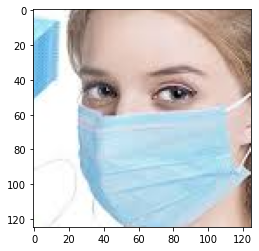

In [4]:
plt.imshow(image, cmap='gray')

In [5]:
# grab R ,G ,B matrix
RGB=[image[:,:,0],image[:,:,1],image[:,:,2]]
# collect reducted R, G, B matrix
X_=[]
for i in RGB:
    #the dimension you want to keep
    p=PCA(50)
    #find the eigen vectros and values
    p.fit(i)
    #projection
    p.transform(i)
    #inverse projection
    X_.append(p.inverse_transform())
# merge reducted R,G,B to (n,n,3) matrix
image_reduct=cv2.merge((X_[0],X_[1],X_[2]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


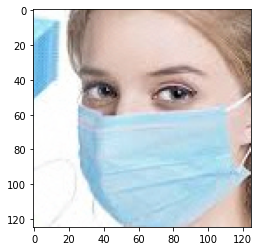

In [7]:
plt.imshow(image_reduct, cmap='gray')